Name : Naila Nausin

StudentID : 202211064

Linear Discriminant Analysis (LDA) is a supervised learning algorithm used for classification tasks in machine learning. It is a technique used to find a linear combination of features that best separates the classes in a dataset.

LDA works by projecting the data onto a lower-dimensional space that maximizes the separation between the classes. It does this by finding a set of linear discriminants that maximize the ratio of between-class variance to within-class variance. In other words, it finds the directions in the feature space that best separate the different classes of data.

LDA assumes that the data has a Gaussian distribution and that the covariance matrices of the different classes are equal. It also assumes that the data is linearly separable, meaning that a linear decision boundary can accurately classify the different classes.

In [ ]:
#Importing Libraries:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import gensim
from gensim import corpora
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
#Mounting Drive:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading the Dataset:
df = pd.read_csv("/content/drive/MyDrive/tripadvisor_hotel_reviews.csv")
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
df.shape

(20491, 2)

In [ ]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
df['Processed_Review'] = df['Review'].apply(lambda x:' '.join([word for word in x.split() if word.lower() not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Tokenization, Lemmatization and Stemming 
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def tokenize(text):
  tokens = re.split('\W+', text)
  return [stemmer.stem(lemmatizer.lemmatize(word.lower())) for word in tokens]

df['Tokenized_Review'] = df['Processed_Review'].apply(lambda x: tokenize(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


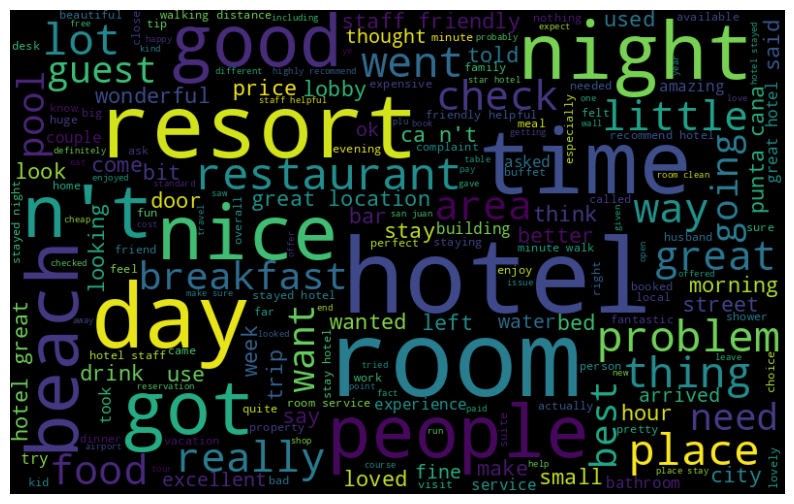

In [ ]:
# WordCloud:
all_Words = ' '.join([text for text in df['Processed_Review']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_Words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
dictionary = corpora.Dictionary(df['Tokenized_Review'])
corpus = [dictionary.doc2bow(text) for text in df['Tokenized_Review']]

In [ ]:
#Apply LDA:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics =8, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

(0, '0.090*"beach" + 0.076*"resort" + 0.049*"pool" + 0.030*"water" + 0.023*"vacat" + 0.021*"punta" + 0.021*"cana" + 0.019*"ocean" + 0.013*"swim" + 0.012*"food"')
(1, '0.047*"bed" + 0.041*"shower" + 0.031*"bathroom" + 0.025*"tv" + 0.023*"water" + 0.015*"wall" + 0.015*"bath" + 0.014*"light" + 0.014*"small" + 0.013*"floor"')
(2, '0.072*"hotel" + 0.038*"room" + 0.034*"stay" + 0.025*"" + 0.020*"great" + 0.017*"locat" + 0.016*"staff" + 0.014*"good" + 0.013*"walk" + 0.013*"breakfast"')
(3, '0.063*"serv" + 0.041*"euro" + 0.041*"select" + 0.034*"gorgeou" + 0.034*"french" + 0.026*"egg" + 0.023*"mexican" + 0.022*"meat" + 0.020*"chicken" + 0.018*"chees"')
(4, '0.075*"servic" + 0.029*"guest" + 0.025*"manag" + 0.017*"properti" + 0.016*"experi" + 0.013*"reserv" + 0.011*"qualiti" + 0.010*"receiv" + 0.009*"custom" + 0.009*"offer"')
(5, '0.035*"room" + 0.034*"t" + 0.034*"n" + 0.011*"day" + 0.011*"check" + 0.010*"night" + 0.009*"got" + 0.009*"2" + 0.009*"like" + 0.009*"time"')
(6, '0.019*"food" + 0.017*"

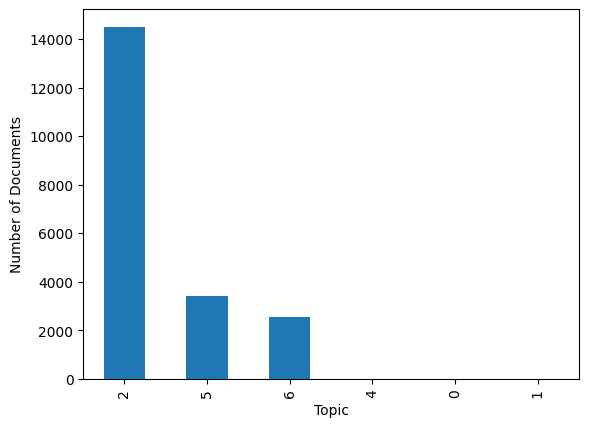

In [ ]:
for topic in lda_model.print_topics(num_topics=8, num_words=10):
  print(topic)

dominant_topics = []
for i in range(len(corpus)):
  topic_weights = lda_model.get_document_topics(corpus[i], minimum_probability=0.0)
  dominant_topic = max(topic_weights, key=lambda x: x[1])
  dominant_topics.append(dominant_topic[0])
df['Dominant_Topic'] = dominant_topics
df['Dominant_Topic'].value_counts().plot(kind='bar')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.show()

In the above code, we have imported libraries such as pandas to deal with data frames/datasets, re for regular expression, nltk is a natural language tool kit in which we have imported modules like stopwords which is nothing but “dictionary” and PorterStemmer to generate root word.